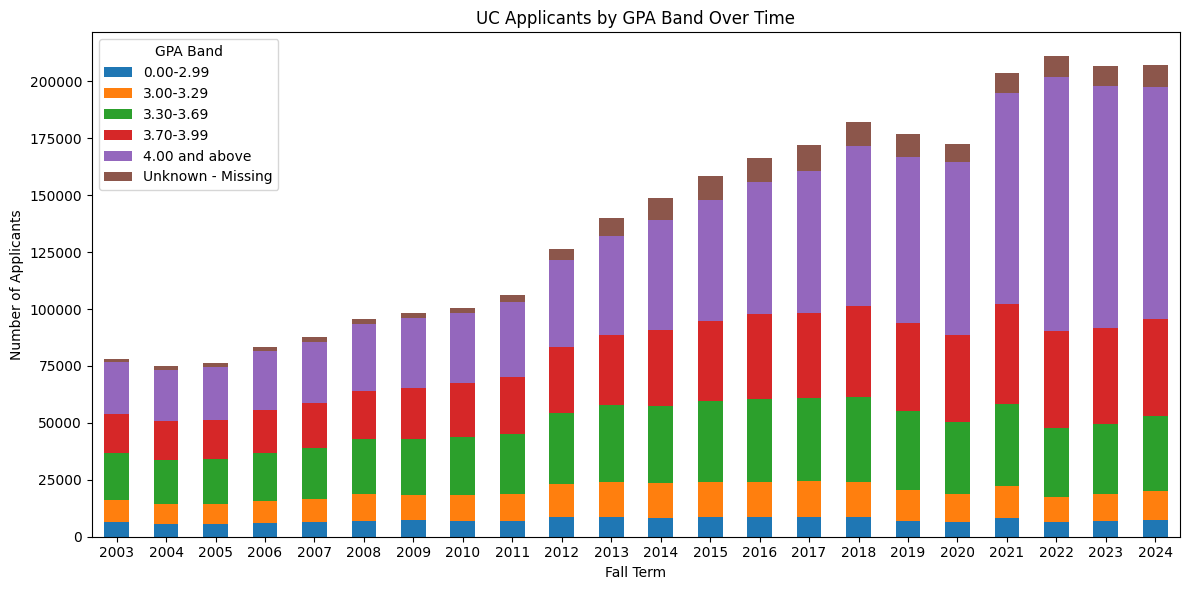

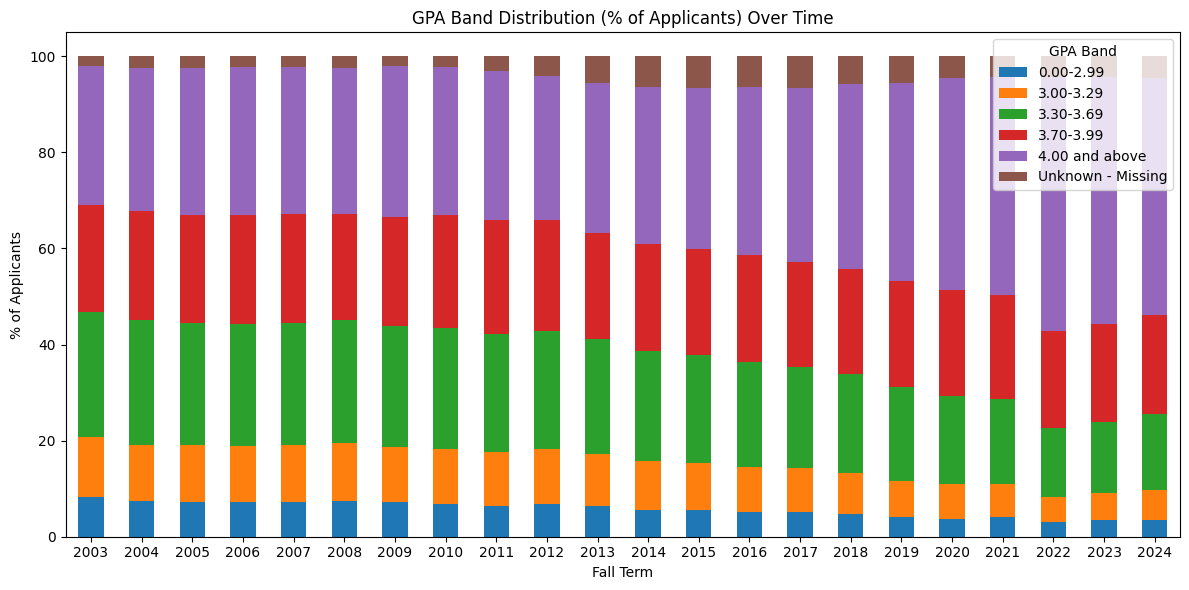

In [6]:
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath('../scripts')) 

from clean_data import load_and_clean_gpa_distribution

df_gpa_dist = load_and_clean_gpa_distribution()
df_gpa_dist.head()

df_gpa_dist.groupby(['Fall term', 'GPA Band'])['Applicants'].sum().unstack().plot(
    kind='bar', stacked=True, figsize=(12, 6),
    title="UC Applicants by GPA Band Over Time"
)
plt.ylabel('Number of Applicants')
plt.xlabel('Fall Term')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


df_pct = df_gpa_dist.copy()
# Calculate total applicants per year
total_by_year = df_pct.groupby('Fall term')['Applicants'].transform('sum')

# Compute percentages
df_pct['Percentage'] = df_pct['Applicants'] / total_by_year * 100

# Pivot and plot
df_pct.pivot(index='Fall term', columns='GPA Band', values='Percentage').plot(
    kind='bar', stacked=True, figsize=(12, 6),
    title='GPA Band Distribution (% of Applicants) Over Time'
)
plt.ylabel('% of Applicants')
plt.xlabel('Fall Term')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


